# AVIS RESTAURANT 


#### Pitch du projet

Votre entreprise souhaite améliorer sa plateforme avec **une nouvelle fonctionnalité de collaboration**. Les utilisateurs pourront par exemple poster des avis et des photos sur leur restaurant préféré. Ce sera aussi l’occasion, pour l’entreprise, de mieux comprendre les avis postés par les utilisateurs.

#### USE CASE
En tant qu’utilisateur de Avis Restau, je peux :

- poster des avis sous forme de commentaires.
- poster des photos prises dans le restaurant.

En tant qu’Avis Restau, je souhaite :

- Détecter les sujets d’insatisfaction présents dans les commentaires postés sur la plateforme.
- Labelliser automatiquement les photos postées sur la plateforme. Par exemple, identifier les photos relatives à la nourriture, au décor dans le restaurant ou à l’extérieur du restaurant.


#### SCOPE DU PROJET
Étude préliminaire fonctionnalité “Détecter les sujets d’insatisfaction” et  “Labelliser automatiquement les photos postées”


#### Etapes de developpment du projets

- Compréhension de la problématique métier
- Description des jeux de données
- Visualisations graphiques (à l’aide d’une page web générée grâce au package Voilà)
- Conclusion sur la faisabilité

## 1 . Compréhension de la problématique

Le scope du projet tournera autour de deux points :
- La detection des sujets d'insatisfaction
- Labélisation automatiques des photos postées


Les étapes de réalisation souhaités du projet :

- Analyser les commentaires pour détecter les différents sujets d’insatisfaction
    - pré-traitement des données textuelles
    - utilisation de techniques de réduction de dimension
    - visualisation des données de grandes dimensions

- Analyser les photos pour déterminer les catégories des photos 
    - pré-traitement des images
    - utilisation de techniques de réduction de dimension
    - visualisation des données de grandes dimensions

- Collecter un échantillon (environ 200 restaurants) de données via l’API Yelp :
    - récupérer uniquement les champs nécessaires
    - stocker les résultats dans un fichier exploitable (par exemple csv)

In [97]:
# Two Deep Learning model 

# Sentiment Analysis using custmer feedback


# image caption
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:

!ls data/yelp_dataset/yelp_academic_dataset_review.json

data/yelp_dataset/yelp_academic_dataset_review.json


## Read Review data usig Yelp API
In this part, I will request for a given restaurant some reviews and save them in a csv file.



In [3]:
#read 
import pandas as pd
import numpy as np

import requests
import pandas as pd
import nltk


import json

In [4]:
# remastered authentication class

class BearerAuth(requests.auth.AuthBase):
    def __init__(self, token):
        self.token = token
    def __call__(self, r):
        r.headers["authorization"] = "Bearer " + self.token
        return r


In [5]:
# some utils functions
def requestToDataFrame(site):
    """
    args:
    return: 
    -DataFrame of request
    """
    df=pd.DataFrame()
    response = requests.get(site, auth=BearerAuth(yelp_app.apiKey))
    response_json=response.json()
    ide=[]
    text=[]
    for i in range(len(response_json['reviews'])):
        ide.append(response_json['reviews'][i]['id'])
        text.append(response_json['reviews'][i]['text'])
        
    df['id']=ide
    df['text']=text
    return df



In [6]:
from utils import yelp_app 

In [7]:
site="https://api.yelp.com/v3/businesses/north-india-restaurant-san-francisco/reviews"

####  For a given business ID north-india-restaurant-san-francisco, we retrieve review data  

In [8]:
response = requests.get(site, auth=BearerAuth(yelp_app.apiKey))

In [9]:
# yelp api url
# we will bneigin by querying business
# and then from every business id in a given list, we will query reviews

url='https://api.yelp.com/v3/businesses/search'
# NY restaurant
params={'term':'restaurant', 'location':'New York City'}



In [10]:
def apiRestQueryTest(site):
    response = requests.get(site, auth=BearerAuth(yelp_app.apiKey))
    return response.json()['reviews'][0]
    

In [11]:
apiRestQueryTest(site)

{'id': 'rOV69gZok8gX-zXwIHR5Sw',
 'url': 'https://www.yelp.com/biz/north-india-restaurant-san-francisco?adjust_creative=w8flMOM04LfF0175Stp3AA&hrid=rOV69gZok8gX-zXwIHR5Sw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=w8flMOM04LfF0175Stp3AA',
 'text': 'Everything is so delicious! We came for my friends birthday and had the best experience, our server really made it so special.',
 'rating': 5,
 'time_created': '2021-10-26 01:57:24',
 'user': {'id': 'bFOZFadEJYHzaxEr-XinQw',
  'profile_url': 'https://www.yelp.com/user_details?userid=bFOZFadEJYHzaxEr-XinQw',
  'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/o-vc4Ew4OqEsw4DoM8hh2g/o.jpg',
  'name': 'Madeline L.'}}

In [12]:
#req = requests.get(url, params=params, headers=headers)

In [13]:
req = requests.get(url, params=params,  auth=BearerAuth(yelp_app.apiKey))

In [14]:
#req.json()

In [15]:
#response.json()
# check
req.json()['businesses'][0]['alias']

'thursday-kitchen-new-york'

In [16]:
# select some business IDs, mainly restaurant in New York

busnessesIds=[]
busnessesAlias=[]
busnessesNames=[]

for i in range(20):
    busnessesIds.append(req.json()['businesses'][i]['id'])
    busnessesAlias.append(req.json()['businesses'][i]['alias'])
    busnessesNames.append(req.json()['businesses'][i]['name'])

In [17]:
for i in range(19):
    print(busnessesIds[i], " ", busnessesAlias[i] , " ", busnessesNames[i])
    
#busnessesList

fVbUVAiLiGgLA_nxBFxyww   thursday-kitchen-new-york   Thursday Kitchen
J3NT61-AH5d5Gu5tFJhYSw   the-cabin-nyc-new-york-2   The Cabin NYC
qEe7nIhPfEL6L0-VYhWRrA   raku-new-york-6   Raku
ETgJqJHV7BW6pIr9Ox74sA   amélie-new-york   Amélie
0CjK3esfpFcxIopebzjFxA   joes-shanghai-new-york-2   Joe's Shanghai
FlZ1zdVEKWv7dwqm8Uw8-w   raku-new-york-7   Raku
9fG8-RRh1rzuCKN2TmF-QQ   5ive-spice-new-york-2   5ive Spice
WG639VkTjmK5dzydd1BBJA   rubirosa-new-york-2   Rubirosa
uoT2_Wrt1noD6kZOID7tUg   jane-new-york-2   Jane
jjJc_CrkB2HodEinB6cWww   lovemama-new-york   LoveMama
16ZnHpuaaBt92XWeJHCC5A   olio-e-piú-new-york-6   Olio e Piú
liZmIO0FqZwslLJfLDkfgw   wayla-new-york   Wayla
B3_K2kUVbYOU0VaLcj_LTw   thai-villa-new-york-2   Thai Villa
ysqgdbSrezXgVwER2kQWKA   julianas-brooklyn-3   Juliana's
hdiuRS9sVZSMReZm4oV5SA   da-andrea-new-york   Da Andrea
8SehQovJOuQDLbtzLLYLyw   rh-rooftop-restaurant-new-york-new-york-2   RH Rooftop Restaurant New York
nHMDOIX32dGbfpuNUwsLNQ   almar-brooklyn-2   AlMar
aZ

In [18]:
parsed = json.loads(req.text)

In [19]:
reviewId=[]
reviewText=[]

reviewIdList=[]
reviewTextList=[]

for bid in busnessesIds:
    url = "https://api.yelp.com/v3/businesses/" + bid + "/reviews"
    req = requests.get(url, auth=BearerAuth(yelp_app.apiKey))
    parsed = json.loads(req.text)
    for i in range(len(parsed['reviews'])) : 
        reviewId.append(parsed['reviews'][i]['id'])
        reviewText.append(parsed['reviews'][i]['text'])
    reviewIdList+=reviewId
    reviewTextList+=reviewText

In [20]:
print(len(reviewTextList))
print(len(reviewIdList))

df=pd.DataFrame()

df['id']=reviewIdList
df['text']=reviewTextList

630
630


In [21]:
df.head()

,id,text
0,3ZztnP4RqFGD92-5eiOH1w,Exceptional food and service. Sarah was excell...
1,IfM-bzRX5QeSQOdtu2M5fw,Was very impressed about my dinner here and ha...
2,RNqDAIhJaxcLLTeK1OC8rw,Arrived 30 minutes before they opened on a Tue...
3,3ZztnP4RqFGD92-5eiOH1w,Exceptional food and service. Sarah was excell...
4,IfM-bzRX5QeSQOdtu2M5fw,Was very impressed about my dinner here and ha...


In [22]:
df.shape

(630, 2)

In [23]:
df.to_csv("data/reviews_from_query.csv")

In [24]:
# get a photo from the API fro given review id


In [25]:
js=response.json()
#print(js)

In [26]:
js['reviews'][0]['user']['image_url']

'https://s3-media3.fl.yelpcdn.com/photo/o-vc4Ew4OqEsw4DoM8hh2g/o.jpg'

In [27]:
url='https://s3-media3.fl.yelpcdn.com/photo/o-vc4Ew4OqEsw4DoM8hh2g/o.jpg'

In [28]:
# image name

from PIL import Image
import requests
from io import BytesIO

response = requests.get(url)
img = Image.open(BytesIO(response.content))

In [29]:
site="https://api.yelp.com/v3/businesses/north-india-restaurant-san-francisco/reviews"

def callImageRestAPI(site):
    
    
    response = requests.get(site, auth=BearerAuth(yelp_app.apiKey))
    # get an image from a review id
    js=response.json()
    url=js['reviews'][0]['user']['image_url']
    
    #
    
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img
    
    

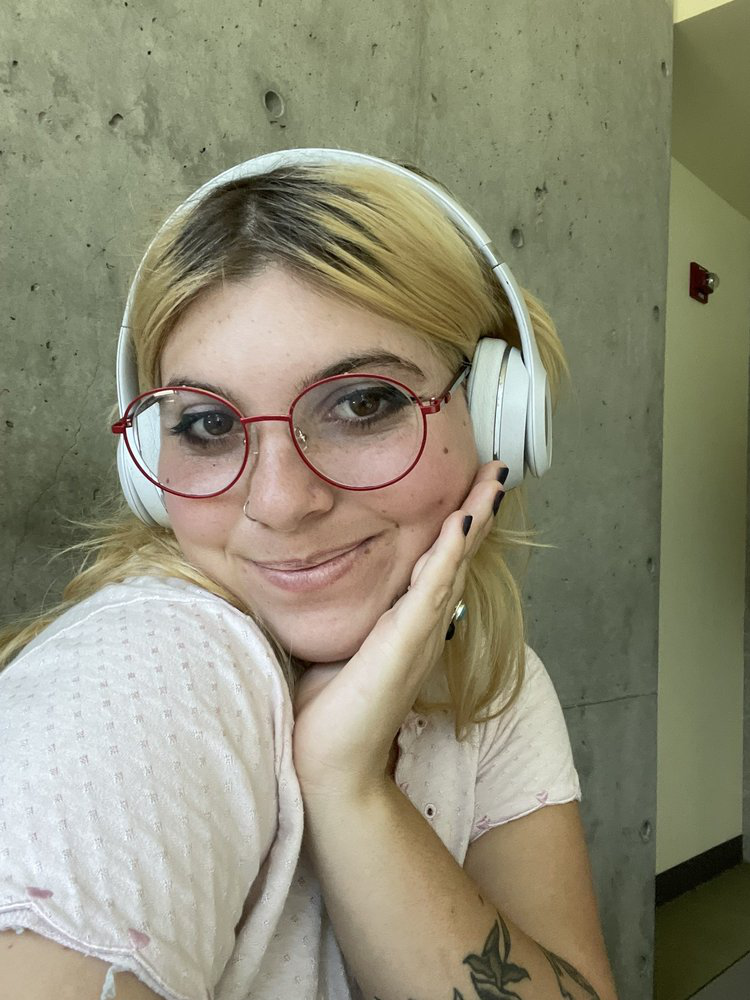

In [30]:
callImageRestAPI(site)

##### create a dataframe

In [31]:
from nltk.stem.snowball import EnglishStemmer
from nltk import PorterStemmer , WordNetLemmatizer, word_tokenize



def dfColumnToList(df, col):
    """args: take a df and its column 
       return a list of rows from df    
    """
    
    com=[]
    for t in df[col].values:
        com.append(t)
    return com
    
def wordTokenizeList(text_list):
    """
    arguments: 
      - text_list: a list containing text
    returns:
      - a list of tokens
    """
    A=[]
    B=[]
    #tokenize 
    for x in text_list:
        A.append(word_tokenize(x))
    # collapse the list
    for i in range(len(A)):
        B+=A[i]
    return B

stopwords=nltk.corpus.stopwords.words("english")

def wordAnalyze(text_token):
    # stemming
    engstem=EnglishStemmer()
    wordan_stem=[engstem.stem(x).lower() for x in text_token]
    
    # lemmatizing
    wolem=WordNetLemmatizer()
    wordan_lem=[wolem.lemmatize(x).lower() for x in text_token]
   
    #stopwords from the input text
    wordan_lem_filter=[e.lower() for e in wordan_lem if len(e)>=3]
    # dropout english reco stopwords
    words=[w for w in wordan_lem_filter  if w.lower() not in stopwords] 
    
    #BoW
    fdist=nltk.FreqDist(words)
    
    return wordan_stem, wordan_lem, words, fdist




### Read a sample of the review data

work on 1000 rows of the json review data set.


In [32]:
filename="data/yelp_dataset/review5000.json"
df = pd.read_json(filename, lines=True)

In [33]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


In [34]:
df.stars.value_counts()

5    2082
4    1284
3     600
1     598
2     436
Name: stars, dtype: int64

In [35]:
# select 1 and 2 stars
df=df.loc[df.stars <=2]

In [36]:
df.text.tail()

4969    I feel like they just were not trying.  They s...
4976    There were maybe 8 tables in the restaurant,  ...
4989    The staff does not communicate with each other...
4990    By far my most disappointing bar/lounge from a...
4995    I thought the pizza was pretty tasty but the m...
Name: text, dtype: object

In [37]:
df.shape

(1034, 9)

In [38]:
# take the text column
text_list=dfColumnToList(df, 'text')

In [39]:
len(text_list)
#text_list

1034

In [40]:
# tokenization
text_token=wordTokenizeList(text_list)
print(text_token[:20])


['I', "'ve", 'stayed', 'at', 'many', 'Marriott', 'and', 'Renaissance', 'Marriott', "'s", 'and', 'this', 'was', 'a', 'huge', 'disappointment', '!', 'The', 'front', 'desk']


In [41]:
print(len(text_token))

161424


In [42]:
wordan_stem, wordan_lem, words, fdist=wordAnalyze(text_token)

In [43]:
print(wordan_stem[:20])

['i', 've', 'stay', 'at', 'mani', 'marriott', 'and', 'renaiss', 'marriott', "'s", 'and', 'this', 'was', 'a', 'huge', 'disappoint', '!', 'the', 'front', 'desk']


In [44]:
print(wordan_lem[:20])

['i', "'ve", 'stayed', 'at', 'many', 'marriott', 'and', 'renaissance', 'marriott', "'s", 'and', 'this', 'wa', 'a', 'huge', 'disappointment', '!', 'the', 'front', 'desk']


In [45]:
print(words[:20])

["'ve", 'stayed', 'many', 'marriott', 'renaissance', 'marriott', 'huge', 'disappointment', 'front', 'desk', 'atrium', 'nice', 'starbucks', 'site', 'nice', 'room', 'run', 'old', 'flat', 'screen']


In [46]:
print(fdist.most_common(30))

[("n't", 1116), ('food', 661), ('time', 574), ('place', 551), ('service', 530), ('like', 519), ('would', 514), ('one', 486), ('get', 472), ('back', 460), ('good', 395), ('...', 323), ('order', 320), ('could', 313), ('even', 308), ('never', 286), ('got', 283), ('customer', 272), ('went', 272), ('said', 270), ('told', 266), ('really', 259), ('minute', 256), ('ordered', 247), ('table', 235), ('came', 234), ('people', 224), ('asked', 219), ('restaurant', 216), ('know', 213)]


## Bag Of Words

Let's go deeper to try to understand what is bag of words.

In [47]:
from keras.preprocessing.text import Tokenizer

In [48]:
tokenizer=Tokenizer()

In [49]:
tokenizer.fit_on_texts(text_list)

In [50]:
bagOfWord=tokenizer.texts_to_matrix(text_list, mode='freq')

In [51]:
bagOfWord.shape

(1034, 9357)

In [52]:
bagOfWord[:10, :5]

array([[0.        , 0.04      , 0.05333333, 0.        , 0.01333333],
       [0.        , 0.05263158, 0.        , 0.        , 0.01754386],
       [0.        , 0.08571429, 0.05714286, 0.        , 0.        ],
       [0.        , 0.03225806, 0.03225806, 0.        , 0.03225806],
       [0.        , 0.05128205, 0.02564103, 0.04273504, 0.02564103],
       [0.        , 0.05445545, 0.01980198, 0.05445545, 0.03960396],
       [0.        , 0.0625    , 0.125     , 0.        , 0.        ],
       [0.        , 0.04273504, 0.04273504, 0.02564103, 0.01709402],
       [0.        , 0.07142857, 0.02255639, 0.03759398, 0.03007519],
       [0.        , 0.07777778, 0.02222222, 0.01111111, 0.01111111]])

# LDA

In [53]:
#from LDA_utils import *

In [54]:
# some utils functions for LDA

import sys
from pprint import pprint
import re

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
# from gensim.utils import lemmatize, simple_preprocess cant't import lemmatize from gensim
# we can get from nltk
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords

%matplotlib inline


# tokenize using gensim
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent) 
        



        
        

stop_words = stopwords.words('english')
# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # en_core_web_sm instead of 'en'
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc))
                  if word not in stop_words] for doc in texts_out]    
    return texts_out





# T_SNE 
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

def plotT_SNE():
    
    # Get topic weights
    topic_weights = []
    for i, row_list in enumerate(lda_model[corpus]):
        topic_weights.append([w for i, w in row_list[0]])
    
    # Array of topic weights    
    arr = pd.DataFrame(topic_weights).fillna(0).values
    
    # Keep the well separated points (optional)
    arr = arr[np.amax(arr, axis=1) > 0.35]
    
    # Dominant topic number in each doc
    topic_num = np.argmax(arr, axis=1)
    
    # tSNE Dimension Reduction
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
    tsne_lda = tsne_model.fit_transform(arr)
    
    # Plot the Topic Clusters using Bokeh
    output_notebook()
    n_topics = 4
    mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
    plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
                  plot_width=900, plot_height=700)
    plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
    show(plot)
    
    
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
def plotWordCloud():
    
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
    
    cloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)
    
    topics = lda_model.show_topics(formatted=False)
    
    fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
    
    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')
    
    
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

    

In [55]:
stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say',
                   'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try',
                   'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 
                   'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 
                   'even', 'also', 'may', 'take', 'come'])



In [56]:
# Convert to list
data = df.text.values.tolist() # smart way to do it
data_words = list(sent_to_words(data))
print(data_words[:1])

[['ive', 'stayed', 'at', 'many', 'marriott', 'and', 'renaissance', 'marriotts', 'and', 'this', 'was', 'huge', 'disappointment', 'the', 'front', 'desk', 'and', 'atrium', 'is', 'nice', 'there', 'is', 'starbucks', 'on', 'site', 'which', 'is', 'nice', 'the', 'rooms', 'are', 'run', 'down', 'and', 'old', 'there', 'is', 'flat', 'screen', 'but', 'that', 'is', 'to', 'be', 'expected', 'of', 'renaissance', 'we', 'got', 'this', 'hotel', 'via', 'priceline', 'at', 'rate', 'of', 'night', 'good', 'deal', 'for', 'the', 'price', 'but', 'this', 'is', 'not', 'true', 'renaissance']]


In [57]:
len(df.text.values)

1034

##### Build the Bigram, Trigram Models and Lemmatize
Let’s form the bigram and trigrams using the Phrases model. This is passed to Phraser() for efficiency in speed of execution.

Next, lemmatize each word to its root form, keeping only nouns, adjectives, verbs and adverbs.

We keep only these POS tags because they are the ones contributing the most to the meaning of the sentences. Here, I use spacy for lemmatization.

In [58]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [59]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [60]:
data_ready=process_words(data_words, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

##### Build the Topic Model¶
To build the LDA topic model using LdaModel(), you need the corpus and the dictionary. Let’s create them first and then build the model. The trained topics (keywords and weights) are printed below as well.

If you examine the topic key words, they are nicely segregate and collectively represent the topics we initially chose: Christianity, Hockey, MidEast and Motorcycles. Nice!

In [61]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)
#id2word = corpora.Dictionary(data_words)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.021*"taste" + 0.021*"fry" + 0.014*"sauce" + 0.013*"coffee" + 0.013*"meal" '
  '+ 0.012*"back" + 0.010*"definitely" + 0.009*"bit" + 0.009*"beer" + '
  '0.008*"fine"'),
 (1,
  '0.028*"food" + 0.025*"order" + 0.022*"place" + 0.017*"wait" + '
  '0.016*"service" + 0.015*"time" + 0.013*"bad" + 0.013*"table" + 0.012*"bar" '
  '+ 0.012*"really"'),
 (2,
  '0.020*"tell" + 0.017*"back" + 0.016*"give" + 0.014*"customer" + '
  '0.012*"call" + 0.012*"service" + 0.011*"hour" + 0.011*"work" + 0.011*"time" '
  '+ 0.011*"never"'),
 (3,
  '0.020*"feel" + 0.015*"open" + 0.015*"close" + 0.014*"year" + 0.014*"car" + '
  '0.013*"guy" + 0.012*"help" + 0.011*"show" + 0.010*"month" + 0.009*"nail"')]


### What is the Dominant topic and its percentage contribution in each document¶
In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

This way, you will know which document belongs predominantly to which topic.

In [62]:

# What is the Dominant topic and its percentage contribution in each document
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),
                                                                  round(prop_topic,4),
                                                                  topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [63]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.9646,"tell, back, give, customer, call, service, hou...","[stay, huge, disappointment, front_desk, atriu..."
1,1,1.0,0.8227,"food, order, place, wait, service, time, bad, ...","[place, cool, chill, place, bunch, neanderthal..."
2,2,2.0,0.5503,"tell, back, give, customer, call, service, hou...","[set, perfectly, adequate, food, close, dining..."
3,3,1.0,0.8488,"food, order, place, wait, service, time, bad, ...","[never, order, correct, service, crappy, food,..."
4,4,3.0,0.7790,"feel, open, close, year, car, guy, help, show,...","[disappointing, bolt, follow, fanny, fabric, c..."
5,5,2.0,0.8595,"tell, back, give, customer, call, service, hou...","[wish, give, call, taker, rude, technician, in..."
6,6,0.0,0.4433,"taste, fry, sauce, coffee, meal, back, definit...","[great, coffee, pastry, barista, excellent, st..."
7,7,1.0,0.8444,"food, order, place, wait, service, time, bad, ...","[almost, desolate, restaurant, dingy, evironme..."
8,8,2.0,0.4838,"tell, back, give, customer, call, service, hou...","[first, arrive, coco, key, greet, number, staf..."
9,9,3.0,0.5515,"feel, open, close, year, car, guy, help, show,...","[love, ale, house, time, place, service, star,..."


In [64]:
#df_dominant_topic.Text.iloc[0]

### The most representative sentence for each topic¶
Sometimes you want to get samples of sentences that most represent a given topic. This code gets the most exemplar sentence for each topic.

In [65]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.8979,"taste, fry, sauce, coffee, meal, back, definitely, bit, beer, fine","[disappoint, finally, stop, fry, haddock, sandwich, fry, fry, frozen, greasy, haddock, sandwich,..."
1,1.0,0.9477,"food, order, place, wait, service, time, bad, table, bar, really","[food, bland, tasting, oxtail, seasoning, ask, fruit, punch, look, head, jamaican, restaurant, f..."
2,2.0,0.9646,"tell, back, give, customer, call, service, hour, work, time, never","[stay, huge, disappointment, front_desk, atrium, starbuck, site, room, old, flat, screen, expect..."
3,3.0,0.9133,"feel, open, close, year, car, guy, help, show, month, nail","[todd, jefferie, dumbfuck, conservative, rhetoric, regurgitate, poison, audio]"


#### Word Clouds of Top N Keywords in Each Topic¶
Though you’ve already seen what are the topic keywords in each topic, a word cloud with the size of the words proportional to the weight is a pleasant sight. The coloring of the topics I’ve taken here is followed in the subsequent plots as well.

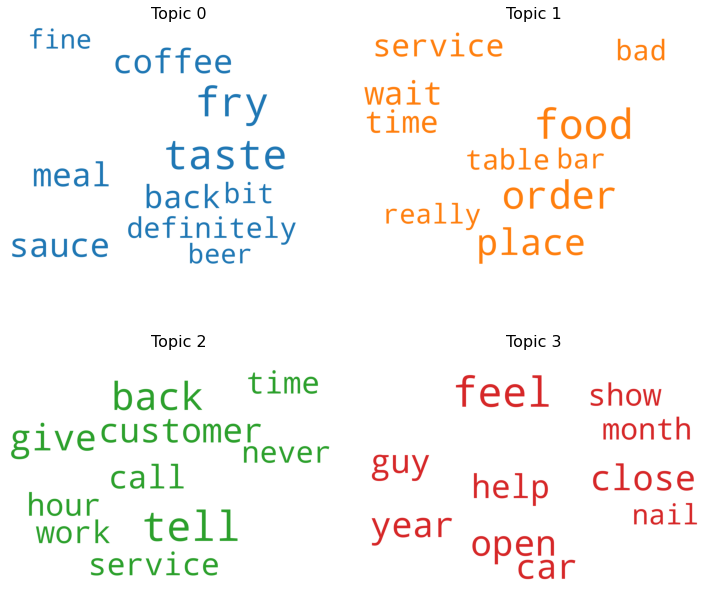

In [66]:
plotWordCloud()

In [67]:
plotT_SNE()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 996 samples in 0.000s...
[t-SNE] Computed neighbors for 996 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 996 / 996
[t-SNE] Mean sigma: 0.061736
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.741386
[t-SNE] KL divergence after 1000 iterations: 0.623740


Loading BokehJS ...

In [68]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.270562 -0.129951       1        1  40.127116
2      0.057944  0.265825       2        1  30.513606
3     -0.127240 -0.102531       3        1  14.766900
0     -0.201267 -0.033343       4        1  14.592378, topic_info=        Term        Freq       Total Category  logprob  loglift
43      food  588.000000  588.000000  Default  30.0000  30.0000
57     order  518.000000  518.000000  Default  29.0000  29.0000
544     tell  324.000000  324.000000  Default  28.0000  28.0000
30     place  467.000000  467.000000  Default  27.0000  27.0000
315     wait  357.000000  357.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
126     back   93.069743  371.758788   Topic4  -4.4096   0.5398
63     bring   55.543646  109.691785   Topic4  -4.9258   1.2442
473      way   54.447418  133.330654   Topic4  -4.9457   1.0291
89   however   50.461245  113.087570   Topic4  -5.0218   1.1177
135     give   54.781812  305.918767   Topic4  -4.9396   0.2047

[195 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
60        3  0.968498         able
36        2  0.978561       always
727       3  0.970320  appointment
175       1  0.484160          ask
175       2  0.513017          ask
...     ...       ...          ...
123       2  0.809053         work
123       3  0.187736         work
295       3  0.991500         year
748       1  0.479332          yet
748       3  0.506722          yet

[197 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

# IMAGE PROCESSING

I am going to try to make it more elaborate.

- Image normalization
- Feature Extractions
- Image Compression
- Image visualization

There are many ways to preprocess image dataset.
- normalize
- autoconstrast
- noise reduction
- equalizing the histogram


In [98]:
# some usefull functions
import numpy as np
from PIL import Image, ImageFilter, ImageOps
from matplotlib import pyplot as plt


# plot an image 
def plotImgHistRaw(file):
    
    img = np.array(Image.open(file))
    n, bins, patches = plt.hist(img.flatten(), bins=range(256))
    plt.show()    
    
def plotImgHist(img):
    
    img = np.array(img)
    n, bins, patches = plt.hist(img.flatten(), bins=range(256))
    plt.show()   
    

#        
def processImage(file):
    
    img = Image.open(file).convert("L") 
    
    img_contrast = ImageOps.autocontrast(img, cutoff=3)
    
    img_equalize = ImageOps.equalize(img_contrast)
    
    img_noise_filtered=img_equalize.filter(ImageFilter.BoxBlur(1))
    
    return img_noise_filtered 

# feature extraction SIFT and ORB

import cv2
import numpy as np

def draw_keyp_sift(imgPath):
    """
    Takes image path and return keypoints to be drawn
    
    """
    img = cv2.imread(imgPath)
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create() # intantiate
    kp = sift.detect(gray,None) # keypoints
    img_sf=cv2.drawKeypoints(gray, kp, gray, color=(255, 0, 0), flags=0)
    return img_sf

def draw_keyp_orb(imgPath):
    """
    Takes image path and return keypoints to be drawn
    
    """
    img = cv2.imread(imgPath)
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    sift = cv2.ORB_create() # intantiate
    kp = sift.detect(gray,None) # keypoints
    img_orb=cv2.drawKeypoints(gray, kp, gray, color=(255, 0, 0), flags=0)
    return img_orb

### Image Preprocessing

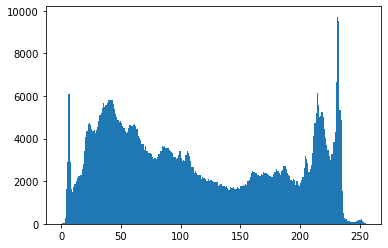

In [99]:
img = Image.open("data/foto1.jpg").convert("L")
plotImgHist(img)

In [100]:
img_noise_filtered=processImage("data/foto1.jpg")

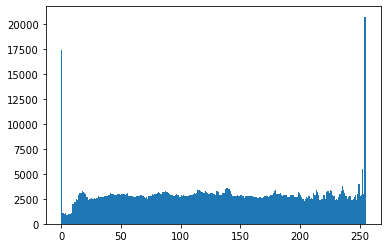

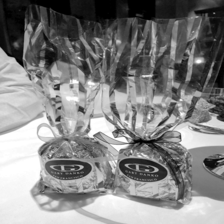

In [103]:
plotImgHist(img_noise_filtered) 
img_noise_filtered.resize((224,224))

## Key Feature Extraction

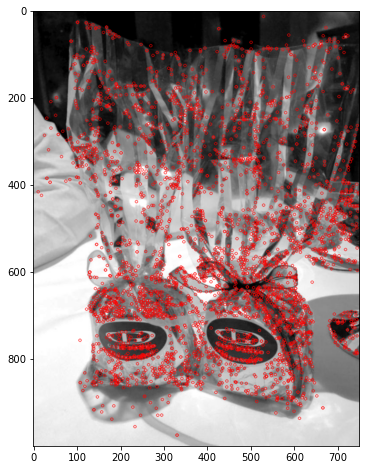

In [107]:
# Find SIFT KP on the processed image
plt.figure(figsize=(8, 8))
ax=plt.imshow(draw_keyp_sift("data/foto11.jpg"))

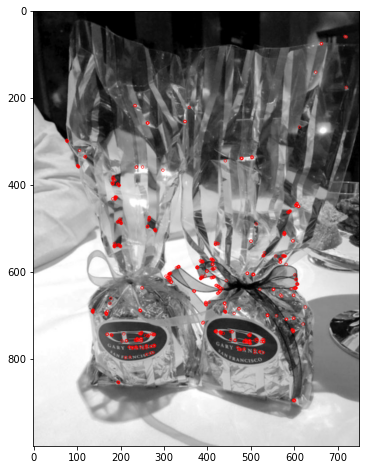

In [108]:
# Find ORB KP on the processed image
plt.figure(figsize=(8, 8))
ax=plt.imshow(draw_keyp_orb("data/foto11.jpg"))

In [109]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
vgg=VGG16()

In [110]:
def featureExtractionVGG16(vgg, img_raw):
    
    # redefine model to output right after the first hidden layer
    vgg = Model(inputs=vgg.inputs, outputs=vgg.layers[1].output)
    
    # load the image with the required shape
    img = load_img(img_raw, target_size=(224, 224))
    
    # convert the image to an array
    img = img_to_array(img)
    
    # expand dimensions so that it represents a single 'sample'
    img = expand_dims(img, axis=0)
    
    # prepare the image (e.g. scale pixel values for the vgg)
    img = preprocess_input(img)
    
    # get feature map for first hidden layer
    feature_maps = vgg.predict(img)
    
    return feature_maps
   

In [111]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [112]:
fmap=featureExtractionVGG16(vgg, 'data/foto1.jpg')

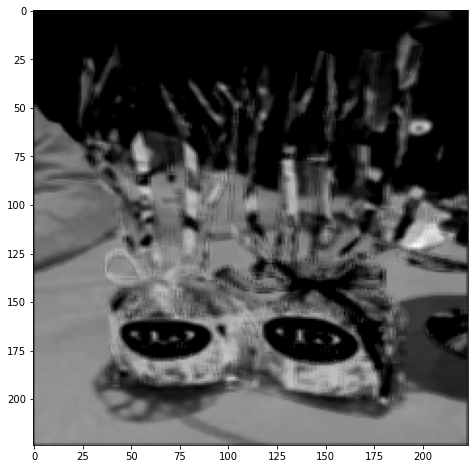

In [123]:
plt.figure(figsize=(8,8))
ax=pyplot.imshow(fmap[0, :, :, 16], cmap='gray')

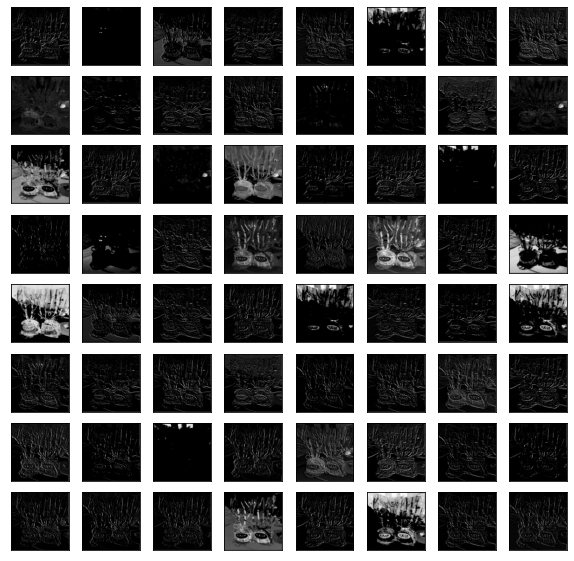

In [124]:
plt.figure(figsize=(10, 10))
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
        ix += 1

ax=plt.show()

## Image Compression using PCA

In this part, we are going to compress images using PCA.

To do that, we are going to load 384 images with their associated label (`drink, menu, outside, food`). 


Compressing an image is like reducing the number of its features, pixels. In an image, columns are number of pixels. For instance, for an 100 by 100 image size, we have 10K pixels, thus 10K variables or features. And then since all our images have the same size, we will have the same number of feature. We could now adress this demension reduction case as a normal dimension reduction case with structred data.

We are going to follow these steps:

- load a sample of images (384)
- flaten images
- fit de PCA
- compute the inverted PCA process to recover shape


In [125]:
# some usefull functions to read image data by provding filename list
import os
def getFileNamesList(formatta, imagePath):
    """
    argument: choose among '.jpeg', '.png', '.gif'
    return: list of files in a directory
    """
    path = imagePath

    folder = os.fsencode(path)
    
    filenames = []
    
    for file in os.listdir(folder):
        filename = os.fsdecode(file)
        if filename.endswith( (formatta) ): 
            filenames.append(filename)
    return filenames


def readImageFromDirectory(imagePath, target_size, fileNameList, nb_channel ):
    """
    target_size: the 1D shape of the image to output
    fileNameList: file gotten from the directory
    nb_channel: number of channel of the input image
    
    return: 4D shape numpy array
    
    
    """
    m=len(fileNameList)
    
    ND=np.arange(m*target_size[0]*target_size[1]*nb_channel).reshape(m, target_size[0],target_size[1],nb_channel)
    
    for im in range(ND.shape[0]):
        
        img=tf.keras.preprocessing.image.load_img(
            imagePath+str(fileNameList[im]), grayscale=False, color_mode="rgb", target_size=target_size,
            interpolation="nearest")
        
        array = tf.keras.preprocessing.image.img_to_array(img)
        
        ND[im]=array
    
    return ND 

In [126]:
#load many images and have image dataset

In [127]:
from tensorflow import keras

import tensorflow as tf

In [128]:
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA

import cv2
import numpy as np


In [129]:
# extract label from photo datasets and use it later for T-SNE data visualization

In [130]:

pic_to_tsne=pd.read_csv("data/yelp_photos/photo_jsonExctract.csv", sep=",", header=None)

pic_to_tsne.columns=["photoid", "annotation", "label"]

pic_to_tsne.dropna(inplace=True)

pic_to_tsne.drop(columns=['annotation'], inplace=True)

print(pic_to_tsne.shape)

print(pic_to_tsne.head())

(384, 2)
                  photoid  label
0  LlbC6SK7qSydV_47sddbww  drink
1  H60MMcyGLFzWPrj-2KLikg  drink
3  FbLx1LvCMFWgN4AAzFIqmQ  drink
4  9UXd4DTUZnh5Vj_JxCXNfQ  drink
5  j1DaMCfm5SmUvu-wnfB4Rw  drink


In [131]:
file=getFileNamesList('.jpg', 'photodataset')
#(formatta, imagePath)

In [132]:
fileToLoad=[ x + str('.jpg') for x in pic_to_tsne.photoid.to_list() ]

In [133]:
fileToLoad[4]

'j1DaMCfm5SmUvu-wnfB4Rw.jpg'

In [134]:
pic_to_tsne.photoid.to_list()[4]

'j1DaMCfm5SmUvu-wnfB4Rw'

In [137]:
label=pic_to_tsne.label.to_list()
label[4]

'drink'

In [138]:
pic_to_tsne.head()

,photoid,label
0,LlbC6SK7qSydV_47sddbww,drink
1,H60MMcyGLFzWPrj-2KLikg,drink
3,FbLx1LvCMFWgN4AAzFIqmQ,drink
4,9UXd4DTUZnh5Vj_JxCXNfQ,drink
5,j1DaMCfm5SmUvu-wnfB4Rw,drink


In [139]:
# read from local directory
# generate 384 photos
im_ds=readImageFromDirectory(imagePath="data/yelp_photos/photos/", target_size = (224, 224),
                             fileNameList=fileToLoad, nb_channel=3 )

In [140]:
im_ds.shape

(384, 224, 224, 3)


We are going to use OpenCV2 to process our image data.

As we know a digital colored image is a combination of R, G, and B arrays stacked over each other. Here we have to split each channel from the image and extract principal components from each of them.

We tested that for 50 176 pixels features, the PCA keep 95% of gloabl information by only using 30 components.


In [141]:
224*224

50176

In [142]:
# 
im_compressed_ds=np.zeros((im_ds.shape[0], 224, 224, 3))

# instantiate
pca_red   = PCA(30)
pca_green = PCA(30)
pca_blue  = PCA(30)



for i in range(im_ds.shape[0]):   
        # splitting the image in R,G,B arrays. here blue, green, red
        blue,green,red = cv2.split(im_ds[i]) 
        
        # fit and transform
        red_transformed = pca_red.fit_transform(red)
        green_transformed = pca_green.fit_transform(green)
        blue_transformed = pca_blue.fit_transform(blue)
        
        # recover to original shape
        red_inverted = pca_red.inverse_transform(red_transformed)
        green_inverted = pca_green.inverse_transform(green_transformed)
        blue_inverted = pca_blue.inverse_transform(blue_transformed)
        
        # stack them
        img_compressed = (np.dstack((red_inverted,
                                     green_inverted, 
                                     blue_inverted))).astype(np.uint8)
        
        im_compressed_ds[i]=img_compressed
        


Original Image


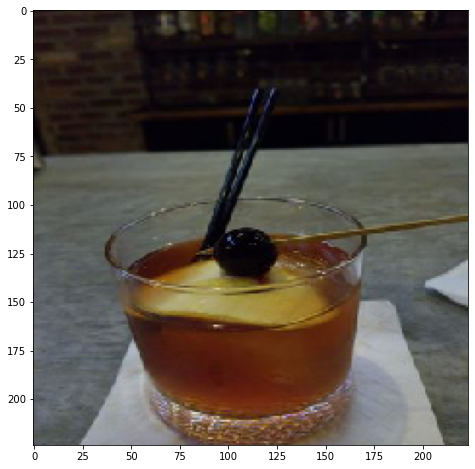

In [143]:
print("Original Image")
plt.figure(figsize=(8,8))
ax=plt.imshow(im_ds[7]/255)

Compressed Image


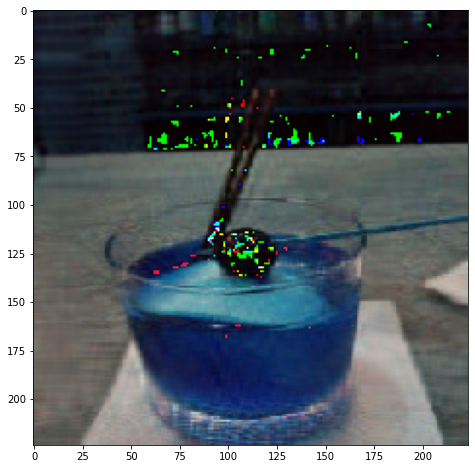

In [144]:
print("Compressed Image")
plt.figure(figsize=(8,8))
ax=plt.imshow(im_compressed_ds[7]/255)

## Image Visualization T-SNE

To visualize our data, we are going to use the T-SNE.



In [145]:
from sklearn.manifold import TSNE

In [146]:
label[:4]

['drink', 'drink', 'drink', 'drink']

In [147]:
# instantiate
tsne = TSNE(n_components=2, perplexity=40.0)

In [148]:
# flatten our dataset
im_flat=im_ds.reshape((384, 224*224*3))
print(im_flat.shape)

(384, 150528)


In [149]:
# fit_and transform
tsne_res = tsne.fit_transform(im_flat)

In [150]:
print(tsne_res[:4])

[[ 3.15031   -4.9523263]
 [ 4.7335844  0.7475804]
 [ 3.2549043 -4.6475086]
 [ 0.8883942 -2.1858475]]


In [151]:
#im_ds_tsne=im_ds.reshape((161, 224*224*3))

In [153]:
df = pd.DataFrame()
df["y"] = label
df["comp-1"] = tsne_res[:,0]
df["comp-2"] = tsne_res[:,1]

In [154]:
df.tail()

,y,comp-1,comp-2
379,menu,-3.060564,1.753402
380,menu,-4.744994,-2.484473
381,menu,-0.678074,-1.695336
382,menu,3.066483,-7.019838
383,menu,6.925819,-0.050506


In [155]:
df.shape

(384, 3)

In [157]:
import seaborn as sns

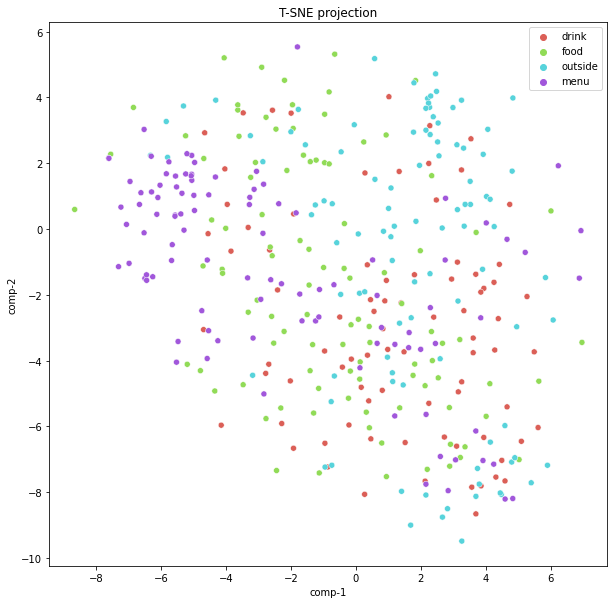

In [158]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=df).set(title="T-SNE projection")